# FILM INDUSTRY ANALYSIS

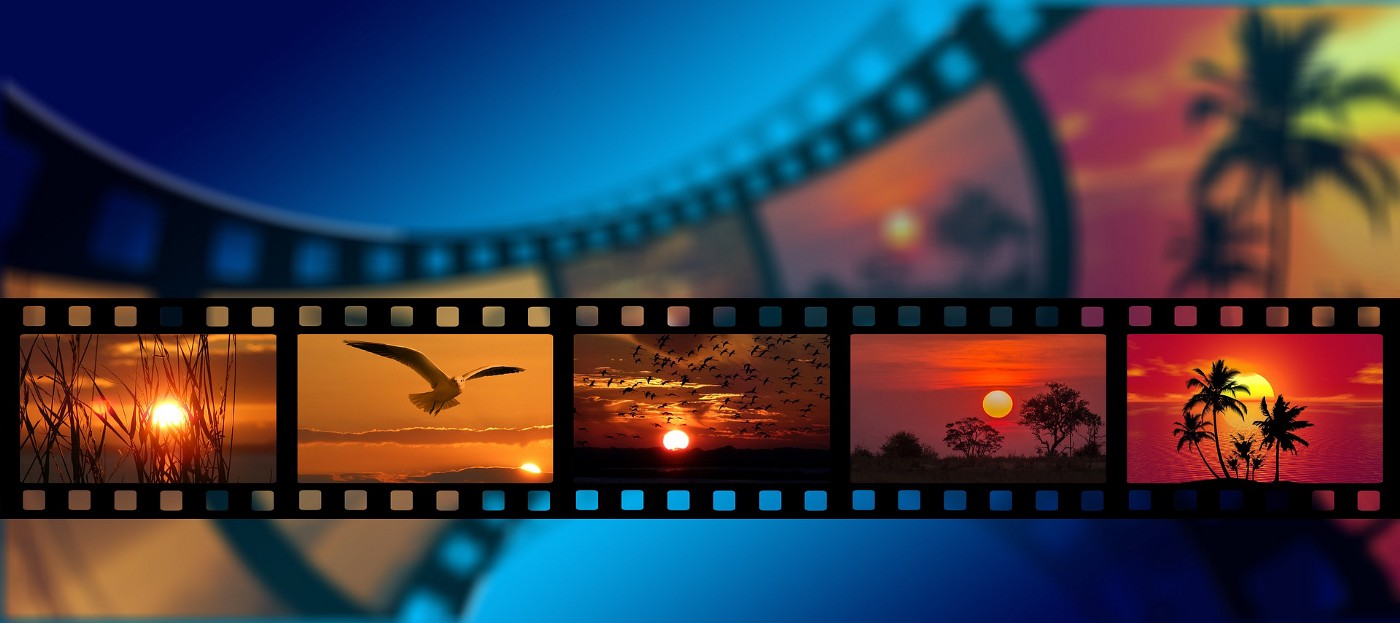

## DESCRIBING THE QUESTION

To find out which films yield the highest revenue in the film industy.

<br>

<br>

### 1. BUSINESS UNDERSTANDING

My client has tasked me to process data from some of the big companies that create original video content. I will explore the types of films that are currently doing the best at the box office and translating those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

 - <font color=blue>Business Objective</font>: To find the most profitable film to create

 - <font color=blue>Assess situation</font>:  Data to be assesed is two zippeddata folders `Mojo_budget_update.csv` and `imdb_movies.csv`

 - <font color=blue>Metric of success</font>: Genre, Budget and running time of the film. 

<br>

### 2. DATA UNDERSTANDING

The data collected are two zippedfolders from `Box Office Mojo` and `imdb`. The datasets are in the csv format and contain tabulated data that will be used in the data analysis. Box Office Mojo and imdb are both doing well in the box office therefore they are suitable datasets to be used.

<br>

### 3. DATA PREPARATION

***i. Loading libraries***

In [673]:
#Loading libraries

#pandas for data analysis and data manipulation
import pandas as pd

#numpy for numeric operations
import numpy as np

#seaborn and matplotlib for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import norm


<br>

<br>

***ii. Loading Data***

In [674]:
#Loading data
import pandas as pd
df= pd.read_csv("Mojo_budget_update.csv")
df

,movie_id,title,year,trivia,mpaa,release_date,run_time,distributor,director,writer,...,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4,html
0,tt0099088,Back to the Future Part III,1990,"Stranded in 1955, Marty McFly learns about the...",NaN,May 25,1 hr 58 min,Universal Pictures,Robert Zemeckis,Robert Zemeckis,...,Thomas F. Wilson,40000000.0,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western,https://www.boxofficemojo.com/title/tt0099088/...
1,tt0099165,The Bonfire of the Vanities,1990,"After his mistress runs over a young teen, a W...",R,December 22,2 hr 5 min,Warner Bros.,Brian De Palma,Michael Cristofer,...,Kim Cattrall,47000000.0,15691192.0,NaN,15691192.0,Comedy,Drama,Romance,NaN,https://www.boxofficemojo.com/title/tt0099165/...
2,tt0099348,Dances with Wolves,1990,"Lieutenant John Dunbar, assigned to a remote w...",NaN,November 9,3 hr 1 min,Orion Pictures,Kevin Costner,Michael Blake,...,Rodney A. Grant,22000000.0,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN,https://www.boxofficemojo.com/title/tt0099348/...
3,tt0099422,Dick Tracy,1990,The comic strip detective finds his life vastl...,NaN,June 15,1 hr 45 min,Walt Disney Studios Motion Pictures,Warren Beatty,Chester Gould,...,Charlie Korsmo,47000000.0,103738726.0,59000000.0,162738726.0,Action,Comedy,Crime,Music,https://www.boxofficemojo.com/title/tt0099422/...
4,tt0099423,Die Hard 2,1990,John McClane attempts to avert disaster as rog...,NaN,July 6,2 hr 4 min,Twentieth Century Fox,Renny Harlin,Walter Wager,...,Reginald VelJohnson,70000000.0,117540947.0,122706486.0,240247433.0,Action,Thriller,NaN,NaN,https://www.boxofficemojo.com/title/tt0099423/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,tt8772262,Midsommar,2019,A couple travels to Sweden to visit a rural ho...,R,July 3,2 hr 28 min,A24,Ari Aster,Ari Aster,...,William Jackson Harper,9000000.0,27426361.0,19463936.0,46890297.0,Drama,Horror,Mystery,Thriller,https://www.boxofficemojo.com/title/tt8772262/...
3239,tt8946378,Knives Out,2019,A detective investigates the death of a patria...,PG-13,November 21,2 hr 11 min,Lionsgate,Rian Johnson,Rian Johnson,...,Jamie Lee Curtis,40000000.0,165363234.0,143869563.0,309232797.0,Comedy,Crime,Drama,Mystery,https://www.boxofficemojo.com/title/tt8946378/...
3240,tt9024106,Unplanned,2019,All Abby Johnson ever wanted to do was help wo...,R,March 29,1 hr 49 min,Pure Flix Entertainment,Chuck Konzelman,Abby Johnson,...,Jared Lotz,6000000.0,19005109.0,2046806.0,21051915.0,Biography,Drama,NaN,NaN,https://www.boxofficemojo.com/title/tt9024106/...
3241,tt9134216,Playing with Fire,2019,A crew of rugged firefighters meet their match...,PG,November 7,1 hr 36 min,Paramount Pictures,Andy Fickman,Dan Ewen,...,Tyler Mane,29900000.0,44451847.0,24179822.0,68631669.0,Comedy,Family,NaN,NaN,https://www.boxofficemojo.com/title/tt9134216/...


<br>

> $\color{blue}{\text{Preview of the data}}$

In [675]:
#preview of the data
df.head()

,movie_id,title,year,trivia,mpaa,release_date,run_time,distributor,director,writer,...,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4,html
0,tt0099088,Back to the Future Part III,1990,"Stranded in 1955, Marty McFly learns about the...",NaN,May 25,1 hr 58 min,Universal Pictures,Robert Zemeckis,Robert Zemeckis,...,Thomas F. Wilson,40000000.0,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western,https://www.boxofficemojo.com/title/tt0099088/...
1,tt0099165,The Bonfire of the Vanities,1990,"After his mistress runs over a young teen, a W...",R,December 22,2 hr 5 min,Warner Bros.,Brian De Palma,Michael Cristofer,...,Kim Cattrall,47000000.0,15691192.0,NaN,15691192.0,Comedy,Drama,Romance,NaN,https://www.boxofficemojo.com/title/tt0099165/...
2,tt0099348,Dances with Wolves,1990,"Lieutenant John Dunbar, assigned to a remote w...",NaN,November 9,3 hr 1 min,Orion Pictures,Kevin Costner,Michael Blake,...,Rodney A. Grant,22000000.0,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN,https://www.boxofficemojo.com/title/tt0099348/...
3,tt0099422,Dick Tracy,1990,The comic strip detective finds his life vastl...,NaN,June 15,1 hr 45 min,Walt Disney Studios Motion Pictures,Warren Beatty,Chester Gould,...,Charlie Korsmo,47000000.0,103738726.0,59000000.0,162738726.0,Action,Comedy,Crime,Music,https://www.boxofficemojo.com/title/tt0099422/...
4,tt0099423,Die Hard 2,1990,John McClane attempts to avert disaster as rog...,NaN,July 6,2 hr 4 min,Twentieth Century Fox,Renny Harlin,Walter Wager,...,Reginald VelJohnson,70000000.0,117540947.0,122706486.0,240247433.0,Action,Thriller,NaN,NaN,https://www.boxofficemojo.com/title/tt0099423/...


<br>

<br>

***iii. Data Understanding.***

> $\color{blue}{\text{General description of the data}}$

In [676]:
#General description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3243 entries, 0 to 3242
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3243 non-null   object 
 1   title            3243 non-null   object 
 2   year             3243 non-null   int64  
 3   trivia           3243 non-null   object 
 4   mpaa             3082 non-null   object 
 5   release_date     3242 non-null   object 
 6   run_time         3243 non-null   object 
 7   distributor      3228 non-null   object 
 8   director         3243 non-null   object 
 9   writer           3234 non-null   object 
 10  producer         3230 non-null   object 
 11  composer         3138 non-null   object 
 12  cinematographer  3129 non-null   object 
 13  main_actor_1     3243 non-null   object 
 14  main_actor_2     3243 non-null   object 
 15  main_actor_3     3243 non-null   object 
 16  main_actor_4     3240 non-null   object 
 17  budget        

In [677]:
df.shape

(3243, 26)

> $\color{blue}{\text{Statistical description of the data}}$

In [678]:
#Statistical description
df.describe()

,year,budget,domestic,international,worldwide
count,3243.000000,3.243000e+03,3.224000e+03,2.833000e+03,3.236000e+03
mean,2006.664200,4.621878e+07,6.149192e+07,8.915078e+07,1.393122e+08
std,7.203684,4.708696e+07,8.036629e+07,1.497687e+08,2.162107e+08
min,1990.000000,2.200000e+02,3.000000e+01,8.950000e+02,3.000000e+01
25%,2001.000000,1.400000e+07,1.300557e+07,8.200000e+06,1.893990e+07
50%,2007.000000,3.000000e+07,3.539594e+07,3.628046e+07,6.225159e+07
75%,2012.000000,6.100000e+07,7.728525e+07,1.032500e+08,1.697622e+08
max,2020.000000,3.560000e+08,9.366622e+08,2.029931e+09,2.797801e+09


<br>

<br>

***iv. Data Cleaning***

In [679]:
#checking for missing values
df.isna()

,movie_id,title,year,trivia,mpaa,release_date,run_time,distributor,director,writer,...,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4,html
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3239,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3240,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
3241,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [680]:
#missing values count in descending order
df.isnull().sum().sort_values(ascending= False)

genre_4            2120
genre_3            1022
international       410
genre_2             281
mpaa                161
cinematographer     114
composer            105
domestic             19
distributor          15
producer             13
writer                9
worldwide             7
main_actor_4          3
release_date          1
trivia                0
year                  0
title                 0
run_time              0
html                  0
director              0
main_actor_1          0
main_actor_2          0
main_actor_3          0
budget                0
genre_1               0
movie_id              0
dtype: int64

In [681]:
#percentage of missing values

def missing_values(data):
    miss_val = data.isnull().sum().sort_values(ascending= False)
    
    #percentage of missing values
    percentages = (data.isnull().sum() / len(data)).sort_values(ascending= False)
    
    return percentages

In [682]:
missing_values(df)

genre_4            0.653716
genre_3            0.315140
international      0.126426
genre_2            0.086648
mpaa               0.049645
cinematographer    0.035153
composer           0.032377
domestic           0.005859
distributor        0.004625
producer           0.004009
writer             0.002775
worldwide          0.002158
main_actor_4       0.000925
release_date       0.000308
trivia             0.000000
year               0.000000
title              0.000000
run_time           0.000000
html               0.000000
director           0.000000
main_actor_1       0.000000
main_actor_2       0.000000
main_actor_3       0.000000
budget             0.000000
genre_1            0.000000
movie_id           0.000000
dtype: float64

In [683]:
#dataframe of missing values

def missing_values(data):
    miss_val = data.isnull().sum().sort_values(ascending= False)
    
    #percentage of missing values
    percentages = (data.isnull().sum() / len(data)).sort_values(ascending= False)
    
    
    #create a DataFrame for missing values
    missing_df=pd.DataFrame({'Total missing values': miss_val, 'percentage(%)':percentages} )
    
    #if percentage == 0 implies no missing values
    missing_df.drop(missing_df[missing_df['percentage(%)']== 0].index , inplace=True)
                       
    return missing_df

In [684]:
missing_values(df)

,Total missing values,percentage(%)
genre_4,2120,0.653716
genre_3,1022,0.315140
international,410,0.126426
genre_2,281,0.086648
mpaa,161,0.049645
cinematographer,114,0.035153
composer,105,0.032377
domestic,19,0.005859
distributor,15,0.004625
producer,13,0.004009


In [685]:
missing_percentage_df = missing_values(df)
missing_percentage_df

,Total missing values,percentage(%)
genre_4,2120,0.653716
genre_3,1022,0.315140
international,410,0.126426
genre_2,281,0.086648
mpaa,161,0.049645
cinematographer,114,0.035153
composer,105,0.032377
domestic,19,0.005859
distributor,15,0.004625
producer,13,0.004009


In [686]:
#extracting index values in the dataframe
missing_percentage_df.index

Index(['genre_4', 'genre_3', 'international', 'genre_2', 'mpaa',
       'cinematographer', 'composer', 'domestic', 'distributor', 'producer',
       'writer', 'worldwide', 'main_actor_4', 'release_date'],
      dtype='object')

In [689]:
#dropping rows with missing values
df.dropna(axis=0, inplace=True)

In [690]:
df

,movie_id,title,year,trivia,mpaa,release_date,run_time,distributor,director,writer,...,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4,html
13,tt0100029,Lionheart,1990,An Ex-French Soldier begins participating in u...,R,January 11,1 hr 48 min,Universal Pictures,Sheldon Lettich,S.N. Warren,...,Lisa Pelikan,6000000.0,24078196.0,193000.0,24271196.0,Action,Crime,Drama,Sport,https://www.boxofficemojo.com/title/tt0100029/...
74,tt0104231,Far and Away,1992,"A young Irish couple flee to the States, but s...",PG-13,May 22,2 hr 20 min,Universal Pictures,Ron Howard,Bob Dolman,...,Robert Prosky,60000000.0,58883840.0,78900000.0,137783840.0,Adventure,Drama,Romance,Western,https://www.boxofficemojo.com/title/tt0104231/...
79,tt0104694,A League of Their Own,1992,Two sisters join the first female professional...,PG,July 1,2 hr 8 min,Sony Pictures Releasing,Penny Marshall,Kim Wilson,...,Madonna,40000000.0,107533928.0,24906141.0,132440069.0,Comedy,Drama,Family,Sport,https://www.boxofficemojo.com/title/tt0104694/...
86,tt0105121,The People Under the Stairs,1991,Two adults and a juvenile break into a house o...,R,November 1,1 hr 42 min,Universal Pictures,Wes Craven,Wes Craven,...,A.J. Langer,6000000.0,24204154.0,7143000.0,31347154.0,Comedy,Horror,Mystery,Thriller,https://www.boxofficemojo.com/title/tt0105121/...
100,tt0106611,Cool Runnings,1993,When a Jamaican sprinter is disqualified from ...,PG,October 1,1 hr 38 min,Walt Disney Studios Motion Pictures,Jon Turteltaub,Lynn Siefert,...,Rawle D. Lewis,14000000.0,68856263.0,86000000.0,154856263.0,Adventure,Comedy,Family,History,https://www.boxofficemojo.com/title/tt0106611/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3231,tt8385474,A Dog's Journey,2019,A dog finds the meaning of his own existence t...,PG,May 3,1 hr 49 min,Universal Pictures,Gail Mancuso,W. Bruce Cameron,...,Marg Helgenberger,16000000.0,22782371.0,52820202.0,75602573.0,Comedy,Drama,Family,Fantasy,https://www.boxofficemojo.com/title/tt8385474/...
3236,tt8688634,21 Bridges,2019,An embattled NYPD detective is thrust into a c...,R,November 21,1 hr 39 min,STX Entertainment,Brian Kirk,Adam Mervis,...,Stephan James,33000000.0,28539757.0,21400000.0,49939757.0,Action,Crime,Drama,Thriller,https://www.boxofficemojo.com/title/tt8688634/...
3238,tt8772262,Midsommar,2019,A couple travels to Sweden to visit a rural ho...,R,July 3,2 hr 28 min,A24,Ari Aster,Ari Aster,...,William Jackson Harper,9000000.0,27426361.0,19463936.0,46890297.0,Drama,Horror,Mystery,Thriller,https://www.boxofficemojo.com/title/tt8772262/...
3239,tt8946378,Knives Out,2019,A detective investigates the death of a patria...,PG-13,November 21,2 hr 11 min,Lionsgate,Rian Johnson,Rian Johnson,...,Jamie Lee Curtis,40000000.0,165363234.0,143869563.0,309232797.0,Comedy,Crime,Drama,Mystery,https://www.boxofficemojo.com/title/tt8946378/...


In [591]:
list(df.columns)

['movie_id',
 'title',
 'year',
 'trivia',
 'mpaa',
 'release_date',
 'run_time',
 'distributor',
 'director',
 'writer',
 'producer',
 'composer',
 'cinematographer',
 'main_actor_1',
 'main_actor_2',
 'main_actor_3',
 'main_actor_4',
 'budget',
 'domestic',
 'international',
 'worldwide',
 'genre_1',
 'genre_2',
 'genre_3',
 'genre_4',
 'html']

In [587]:
#checking for duplicates
df.duplicated().value_counts()

False    881
dtype: int64

In [695]:
#dataframe in descending order of budget
box_office=df.sort_values(by="budget", ascending= False)
box_office

,movie_id,title,year,trivia,mpaa,release_date,run_time,distributor,director,writer,...,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4,html
3019,tt4154796,Avengers: Endgame,2019,After the devastating events of,PG-13,April 24,3 hr 1 min,Walt Disney Studios Motion Pictures,Anthony Russo,Christopher Markus,...,Chris Hemsworth,356000000.0,858373000.0,1.939428e+09,2.797801e+09,Action,Adventure,Drama,Sci-Fi,https://www.boxofficemojo.com/title/tt4154796/...
2834,tt2527336,Star Wars: Episode VIII - The Last Jedi,2017,Rey develops her newly discovered abilities wi...,PG-13,December 13,2 hr 32 min,Walt Disney Studios Motion Pictures,Rian Johnson,Rian Johnson,...,Carrie Fisher,317000000.0,620181382.0,7.123585e+08,1.332540e+09,Action,Adventure,Fantasy,Sci-Fi,https://www.boxofficemojo.com/title/tt2527336/...
2835,tt2527338,Star Wars: Episode IX - The Rise of Skywalker,2019,The surviving members of the resistance face t...,PG-13,December 18,2 hr 22 min,Walt Disney Studios Motion Pictures,J.J. Abrams,Chris Terrio,...,Daisy Ridley,275000000.0,515202542.0,5.589417e+08,1.074144e+09,Action,Adventure,Fantasy,Sci-Fi,https://www.boxofficemojo.com/title/tt2527338/...
3144,tt6105098,The Lion King,2019,"After the murder of his father, a young lion p...",PG,July 12,1 hr 58 min,Walt Disney Studios Motion Pictures,Jon Favreau,Jeff Nathanson,...,Chiwetel Ejiofor,260000000.0,543638043.0,1.113305e+09,1.656943e+09,Adventure,Animation,Drama,Family,https://www.boxofficemojo.com/title/tt6105098/...
1531,tt0417741,Harry Potter and the Half-Blood Prince,2009,As Harry Potter,PG,July 15,2 hr 33 min,Warner Bros.,David Yates,Steve Kloves,...,Michael Gambon,250000000.0,302305431.0,6.320210e+08,9.343264e+08,Action,Adventure,Family,Fantasy,https://www.boxofficemojo.com/title/tt0417741/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413,tt1470827,Monsters,2010,Six years after Earth has suffered an alien in...,R,September 30,1 hr 34 min,Magnolia Pictures,Gareth Edwards,Gareth Edwards,...,Annalee Jefferies,500000.0,237301.0,4.823137e+06,5.060438e+06,Adventure,Drama,Romance,Sci-Fi,https://www.boxofficemojo.com/title/tt1470827/...
1365,tt0374102,Open Water,2003,Based on the true story of two scuba divers ac...,R,August 6,1 hr 19 min,Lionsgate,Chris Kentis,Chris Kentis,...,Michael E. Williamson,500000.0,30610863.0,2.407262e+07,5.468349e+07,Adventure,Drama,Horror,Thriller,https://www.boxofficemojo.com/title/tt0374102/...
3055,tt4573516,Sleight,2016,A young street magician Jacob Latimore is left...,R,April 28,1 hr 29 min,BH Tilt,J.D. Dillard,J.D. Dillard,...,Donzaleigh Abernathy,250000.0,3986245.0,3.460000e+03,3.989705e+06,Action,Drama,Sci-Fi,Thriller,https://www.boxofficemojo.com/title/tt4573516/...
1429,tt0388230,Malevolence,2004,It's ten years after the kidnapping of Martin ...,R,September 10,1 hr 30 min,Painted Zebra Releasing,Stevan Mena,Stevan Mena,...,Richard Glover,200000.0,127287.0,1.314950e+05,2.587820e+05,Crime,Horror,Mystery,Thriller,https://www.boxofficemojo.com/title/tt0388230/...


<br>

> $\color{blue}{\text{Years with the highest average revenue}}$

In [592]:
#years with the highest average revenue
df.groupby('year')['worldwide'].mean().sort_values(ascending=False)

year
1993    3.752931e+08
2017    3.522602e+08
2014    3.202316e+08
2019    2.982853e+08
1998    2.555825e+08
2012    2.253505e+08
2011    2.203620e+08
1997    2.099260e+08
2009    2.048454e+08
2015    2.042478e+08
2016    1.976856e+08
2020    1.899544e+08
2007    1.871332e+08
1995    1.782200e+08
2013    1.763629e+08
1994    1.722890e+08
2010    1.698271e+08
2018    1.663150e+08
2008    1.638373e+08
1999    1.533730e+08
2005    1.436206e+08
1992    1.351120e+08
2001    1.287169e+08
2002    1.155518e+08
2004    1.130648e+08
2006    1.102683e+08
2000    9.876642e+07
2003    9.613386e+07
1996    6.609953e+07
1991    3.134715e+07
1990    2.427120e+07
Name: worldwide, dtype: float64

In [621]:
df['worldwide'].max()

2797800564.0

<br>

> $\color{blue}{\text{Top 100 films with the highest revenue and their corresponding Genres}}$

In [618]:
#Top 100 films with the highest revenue and their corresponding genres
top_100=df.nlargest(100, 'worldwide')[['title','worldwide','genre_1']]\
.set_index('title')

In [638]:
top_100

,worldwide,genre_1
title,,
Avengers: Endgame,2.797801e+09,Action
Avatar,2.790439e+09,Action
Titanic,2.194440e+09,Drama
Star Wars: Episode VII - The Force Awakens,2.068224e+09,Action
Jurassic World,1.670401e+09,Action
...,...,...
"The Chronicles of Narnia: The Lion, the Witch and the Wardrobe",7.450131e+08,Adventure
The Matrix Reloaded,7.418465e+08,Action
Up,7.350991e+08,Adventure


<br>

> $\color{blue}{\text{Barplot of Top 100 films with the highest revenue and their corresponding genres}}$

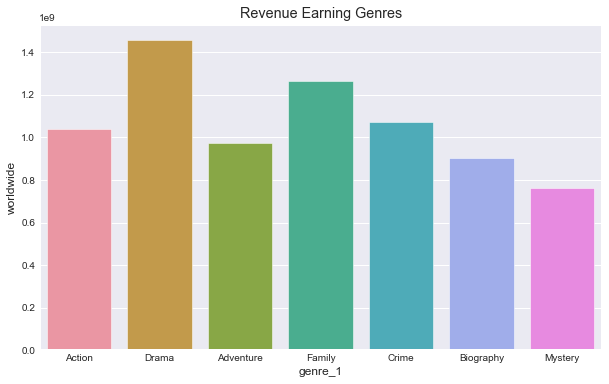

In [637]:
#Top 100 films with the highest revenue and their corresponding genres
ax, bar= plt.subplots(figsize=(9,6))

sns.barplot(x='genre_1', y="worldwide", data=top_100, ci=None)
plt.title("Revenue Earning Genres")

plt.xticks()

plt.show()

<br>

> $\color{blue}{\text{Barplot of Top 10 Highest Revenue movie titles worldwide }}$

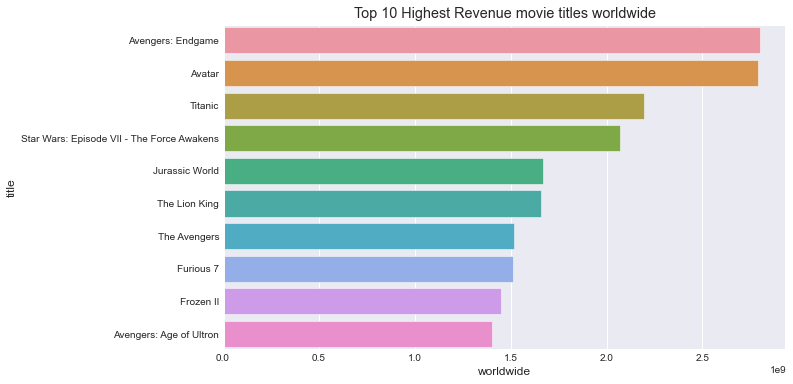

In [646]:
#Top 10 films with the highest revenue
ax, bar= plt.subplots(figsize=(9,6))

sns.barplot(x="worldwide", y=top_100.head(10).index, data=top_100.head(10))

plt.title("Top 10 Highest Revenue movie titles worldwide")


plt.show()

<br>

> $\color{blue}{\text{Bargraph of years with the highest revenue}}$

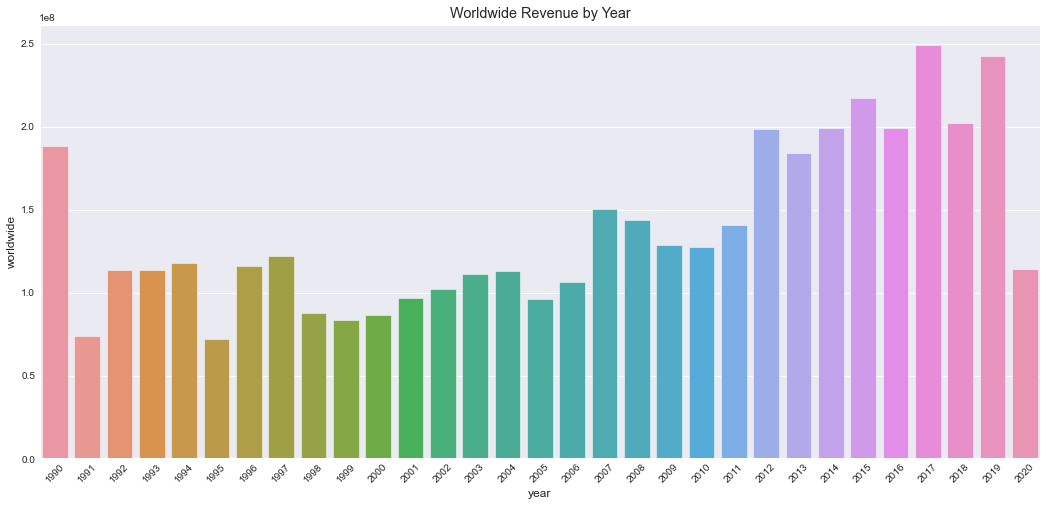

In [651]:
#bargraph of year with the highest revenue
ax, bar= plt.subplots(figsize=(16,8))

sns.barplot(x="year", y="worldwide", data=df, ci=None)

plt.title("Worldwide Revenue by Year")


plt.xticks( rotation= "45")

plt.show()

<br>

<br>

> $\color{blue}{\text{Bargraph showing Genres that require high budget to be produced }}$

<function matplotlib.pyplot.show(close=None, block=None)>

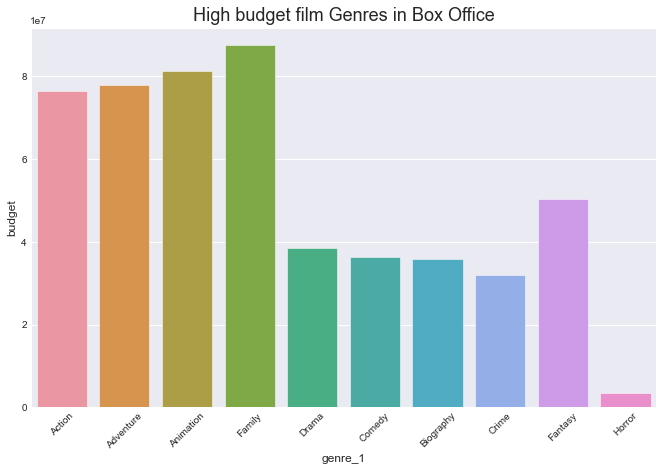

In [700]:
sns.set_style("darkgrid")

#graphical respresentation of missing value
ax, bar= plt.subplots(figsize=(10,7))

#barchart using seaborn
sns.barplot(x=box_office['genre_1'] , y=box_office['budget'], ci=None) 

#label the axis
plt.xlabel=('Genre')
plt.ylabel=('Film budget')
plt.xticks( rotation= "45")

#title
plt.title("High budget film Genres in Box Office", fontsize = 18)

#display the graph
plt.show

<br>

<br>

> $\color{blue}{\text{Realationship between budget and revenue received}}$

In [652]:
df.columns

Index(['movie_id', 'title', 'year', 'trivia', 'mpaa', 'release_date',
       'run_time', 'distributor', 'director', 'writer', 'producer', 'composer',
       'cinematographer', 'main_actor_1', 'main_actor_2', 'main_actor_3',
       'main_actor_4', 'budget', 'domestic', 'international', 'worldwide',
       'genre_1', 'genre_2', 'genre_3', 'genre_4', 'html'],
      dtype='object')

Text(0.5, 1.0, 'Budget vs. Revenue')

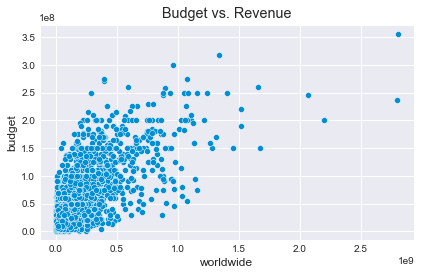

In [654]:
#seaborn for data visualization
sns.scatterplot(x="worldwide", y="budget", data=df)
plt.title("Budget vs. Revenue")

<br>

> $\color{blue}{\text{Average budget to produce a film}}$

In [708]:
#Average budget to produce a film
df["budget"].mean()

63685300.79455165

<br>

> $\color{blue}{\text{Relationship between running time of movie and revenue received}}$

Text(0.5, 1.0, 'Running Time vs. Revenue')

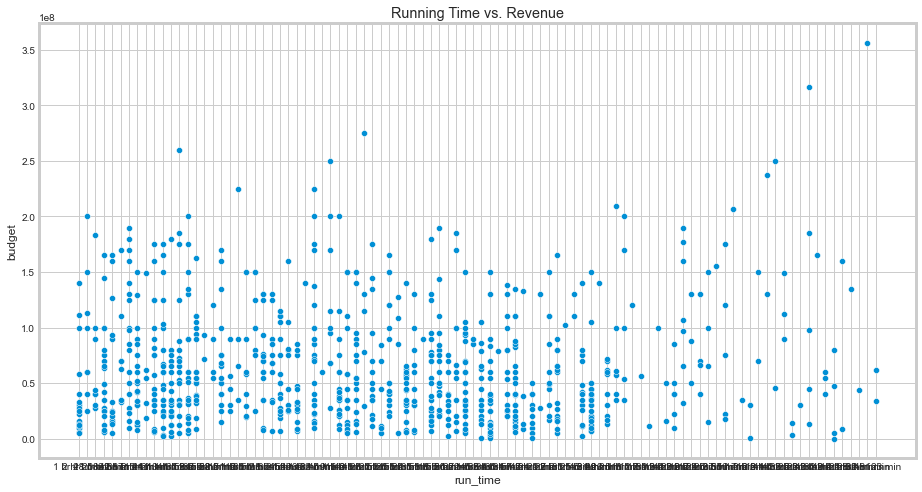

In [707]:
sns.set_style('whitegrid')

ax, bar= plt.subplots(figsize=(14,8))

sns.scatterplot(x="run_time", y="budget", data=df)
plt.title("Running Time vs. Revenue")

<br>

## $\color{green}{\text{imdb dataset}}$

***i. Loading libraries***

In [709]:
#Loading libraries

#pandas for data analysis and data manipulation
import pandas as pd

#numpy for numeric operations
import numpy as np

#seaborn and matplotlib for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import norm


<br>

<br>

***ii. Loading Data***

In [505]:
#Loading data
import pandas as pd
data_frame= pd.read_csv('imdb_movies.csv')
data_frame

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


<br>

> $\color{blue}{\text{Preview of the data}}$

In [710]:
#preview of data
data_frame.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


<br>

<br>

***iii. Data Understanding.***

In [711]:
#General description of the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [508]:
#Statistical description
data_frame.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


<br>

<br>

***iv. Data Cleaning***

In [712]:
#checking for duplicates
data_frame.duplicated().value_counts()

False    7668
dtype: int64

In [713]:
#checking for missing values
data_frame.isna()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False
7664,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
7665,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
7666,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False


In [714]:
#missing values count in descending order
data_frame.isnull().sum().sort_values(ascending= False)

budget      2171
gross        189
rating        77
company       17
runtime        4
country        3
writer         3
votes          3
score          3
released       2
star           1
director       0
year           0
genre          0
name           0
dtype: int64

In [715]:
#percentage of missing values

def missing_vals(data):
    miss_val = data.isnull().sum().sort_values(ascending= False)
    
    #percentage of missing values
    percentages_data = (data.isnull().sum() / len(data)).sort_values(ascending= False)
    
    return percentages_data

In [716]:
missing_vals(data_frame)

budget      0.283125
gross       0.024648
rating      0.010042
company     0.002217
runtime     0.000522
country     0.000391
writer      0.000391
votes       0.000391
score       0.000391
released    0.000261
star        0.000130
director    0.000000
year        0.000000
genre       0.000000
name        0.000000
dtype: float64

In [717]:
missing_percentage_data = missing_vals(data_frame)
missing_percentage_data

budget      0.283125
gross       0.024648
rating      0.010042
company     0.002217
runtime     0.000522
country     0.000391
writer      0.000391
votes       0.000391
score       0.000391
released    0.000261
star        0.000130
director    0.000000
year        0.000000
genre       0.000000
name        0.000000
dtype: float64

In [720]:
#dropping rows with missing values
imdb=data_frame.dropna()
imdb

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [722]:
#dataframe in descending order of gross income
imdb_movies= imdb.sort_values(by=['budget'], ascending= False)
imdb_movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000.0,1.332699e+09,Walt Disney Pictures,152.0
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000.0,9.609965e+08,Walt Disney Pictures,169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,The Living End,Unrated,Comedy,1992,"August 21, 1992 (United States)",6.5,2900.0,Gregg Araki,Gregg Araki,Mike Dytri,United States,22769.0,6.925850e+05,Desperate Pictures,81.0
5114,Paranormal Activity,R,Horror,2007,"October 16, 2009 (United States)",6.3,225000.0,Oren Peli,Oren Peli,Katie Featherston,United States,15000.0,1.933558e+08,Solana Films,86.0
2093,El Mariachi,R,Action,1992,"February 26, 1993 (United States)",6.9,64000.0,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000.0,2.040920e+06,Columbia Pictures,81.0
4507,Primer,PG-13,Drama,2004,"May 27, 2005 (Spain)",6.9,101000.0,Shane Carruth,Shane Carruth,Shane Carruth,United States,7000.0,5.454360e+05,ERBP,77.0


In [736]:
#year with the highest average revenue
imdb_movies.groupby('year')['gross'].mean().sort_values(ascending=False)

year
2020    2.841127e+08
2019    2.450678e+08
2017    2.081188e+08
2018    1.927169e+08
2016    1.762504e+08
2015    1.680571e+08
2014    1.607302e+08
2013    1.596252e+08
2012    1.552328e+08
2011    1.498019e+08
2010    1.328565e+08
2009    1.323977e+08
2007    1.226607e+08
2008    1.223059e+08
2004    1.147133e+08
2006    1.096732e+08
2003    1.081816e+08
2005    1.022235e+08
2002    9.503332e+07
2001    9.375281e+07
1997    8.501497e+07
1999    8.161126e+07
2000    8.136492e+07
1998    7.335474e+07
1994    6.527944e+07
1996    6.301720e+07
1995    6.183214e+07
1990    5.477707e+07
1993    5.188667e+07
1992    4.950053e+07
1991    4.898839e+07
1989    4.846537e+07
1980    4.429196e+07
1982    3.804393e+07
1985    3.403673e+07
1984    3.396954e+07
1988    3.347553e+07
1987    3.228688e+07
1986    2.964930e+07
1981    2.918663e+07
1983    2.796927e+07
Name: gross, dtype: float64

<br>

***v. Data visualization***

> $\color{blue}{\text{High budget film genres in imdb}}$

<function matplotlib.pyplot.show(close=None, block=None)>

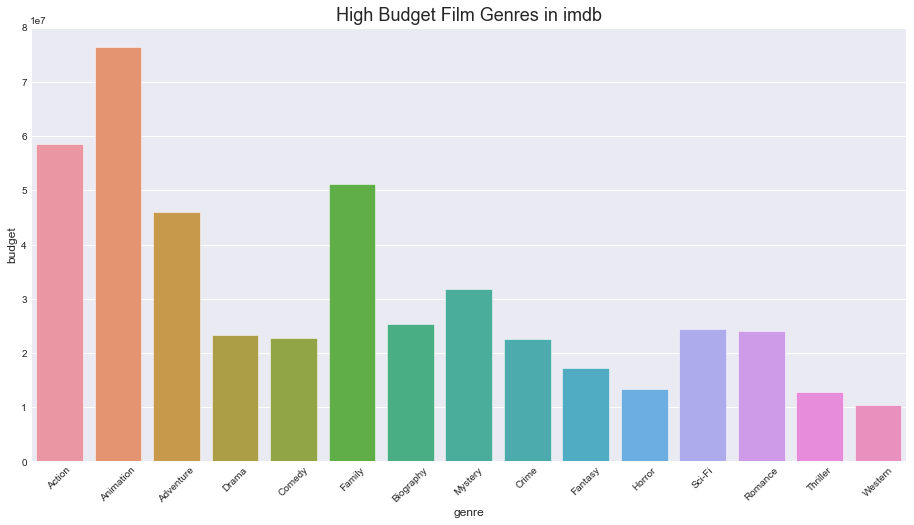

In [724]:
sns.set_style("darkgrid")

#graphical respresentation of missing value
ax, bar= plt.subplots(figsize=(14,8))

#barchart using seaborn
sns.barplot(x=new_data_frame['genre'] , y=new_data_frame['budget'], ci=None) 

#label the axis
plt.xlabel=('Genre')
plt.ylabel=('Film budget')
plt.xticks( rotation= "45")


#title
plt.title("High Budget Film Genres in imdb", fontsize = 18)

#display the graph
plt.show

<br>

> $\color{blue}{\text{Top 100 films with the highest revenue and their corresponding Genres}}$

In [732]:
#Top 100 films with the highest revenue and their corresponding genres
top_100_movies=imdb_movies.nlargest(100, 'gross')[['name','gross','genre']]\
.set_index('name')

In [733]:
top_100_movies

,gross,genre
name,,
Avatar,2.847246e+09,Action
Avengers: Endgame,2.797501e+09,Action
Titanic,2.201647e+09,Drama
Star Wars: Episode VII - The Force Awakens,2.069522e+09,Action
Avengers: Infinity War,2.048360e+09,Action
...,...,...
Deadpool,7.828368e+08,Action
Guardians of the Galaxy,7.733501e+08,Action
The Da Vinci Code,7.600069e+08,Mystery


<br>

> $\color{blue}{\text{Bargraph showing Top 100 films with the highest revenue and their corresponding Genres}}$

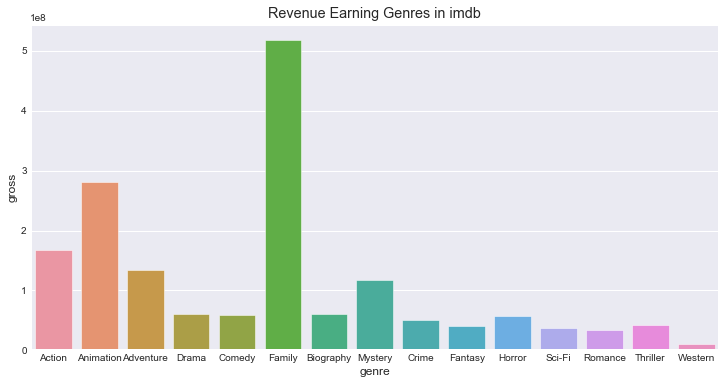

In [734]:
#Top 100 films with the highest revenue and their corresponding genres
ax, bar= plt.subplots(figsize=(11,6))

sns.barplot(x='genre', y="gross", data=imdb_movies, ci=None)
plt.title("Revenue Earning Genres in imdb")

plt.xticks()

plt.show()

In [737]:
list(top_100_movies['genre'].head(10))

['Action',
 'Action',
 'Drama',
 'Action',
 'Action',
 'Animation',
 'Action',
 'Action',
 'Action',
 'Animation']

<br>

> $\color{blue}{\text{Bargraph showing Top 10 films with the highest revenue}}$

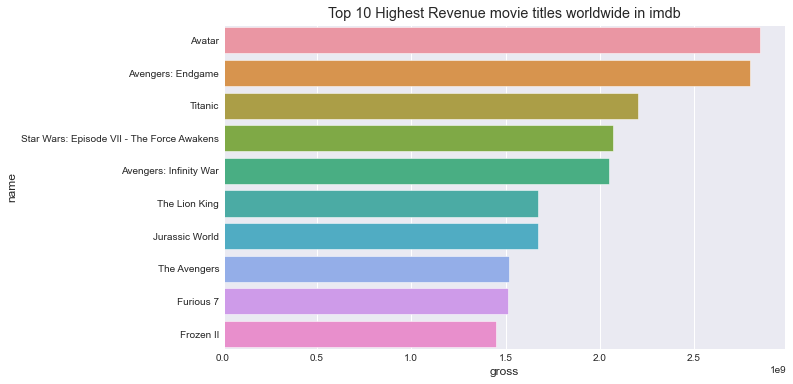

In [738]:
#Top 10 films with the highest revenue
ax, bar= plt.subplots(figsize=(9,6))

sns.barplot(x="gross", y=top_100_movies.head(10).index, data=top_100_movies.head(10))

plt.title("Top 10 Highest Revenue movie titles worldwide in imdb")


plt.show()

<br>

<br>

> $\color{blue}{\text{Bargraph of Years with the Revenue received}}$

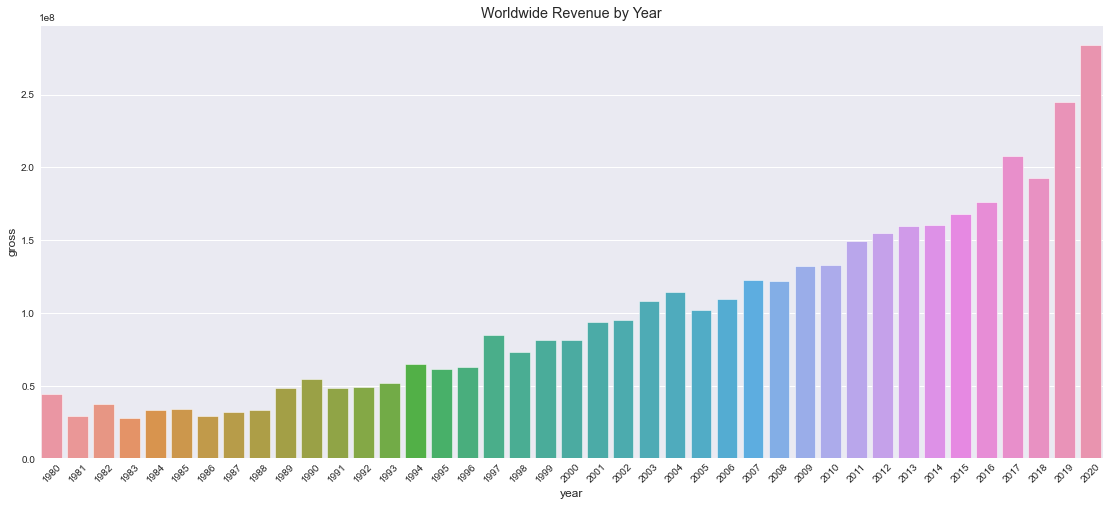

In [740]:
#bargraph of year with the highest average revenue
ax, bar= plt.subplots(figsize=(17,8))

sns.barplot(x="year", y="gross", data=imdb_movies, ci=None)

plt.title("Worldwide Revenue by Year")


plt.xticks( rotation= "45")

plt.show()

<br>

<br>

> $\color{blue}{\text{Relationship between Budget and revenue Received}}$

Text(0.5, 1.0, 'Budget vs. Revenue')

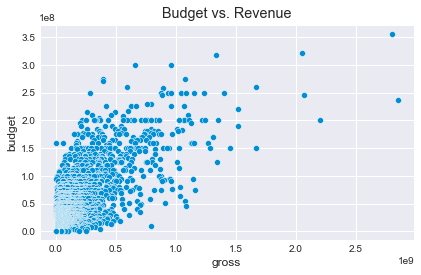

In [742]:
#seaborn for data visualization
sns.scatterplot(x="gross", y="budget", data=imdb_movies)
plt.title("Budget vs. Revenue")

Text(0.5, 1.0, 'Budget vs. Revenue')

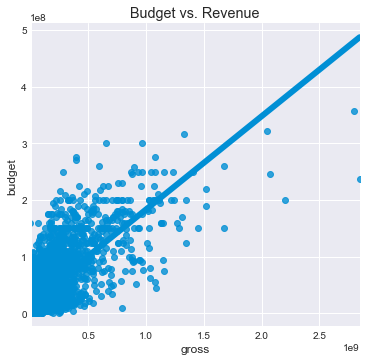

In [784]:
#seaborn for data visualization
sns.lmplot(x="gross",
            y="budget", 
            ci=None,
            data=imdb_movies);
plt.title("Budget vs. Revenue")

<br>

> $\color{blue}{\text{Average budget to produce a movie in imdb}}$

In [791]:
#Average budget to produce a movie in imdb
imdb_movies['budget'].mean()

36009170.47020845

<br>

> $\color{blue}{\text{Relationship between running time of a show and revenue recived}}$

Text(0.5, 1.0, 'Runtime vs. Gross')

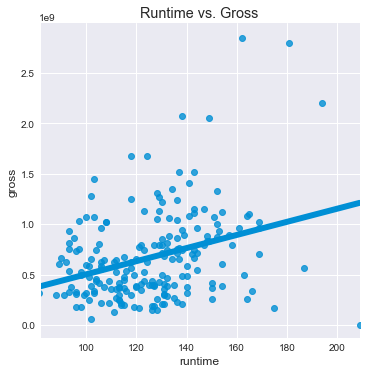

In [786]:
sns.lmplot(x="runtime",
            y="gross", 
            ci=None,
            data=imdb_movies.head(200));
plt.title("Runtime vs. Gross")

Text(0.5, 1.0, 'Gross earnings vs. Movie rating')

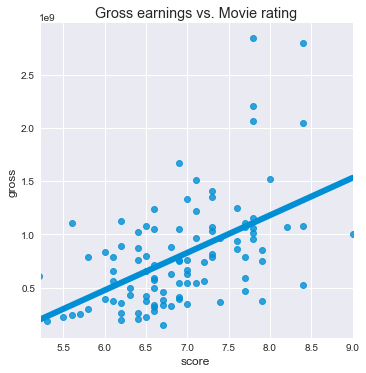

In [778]:
#seaborn for data visualization

sns.lmplot(x="score",
            y="gross", 
            ci=None,
            data=imdb_movies.head(100));
plt.title("Gross earnings vs. Movie rating")

In [792]:
#average running time of movie
imdb_movies['runtime'].mean()

108.15273934698395

<br>

### 4. CONCLUSION

Based on the data analysed, we can conclude on the following:
 - Runtime does not affect movie profit that much.
 - Animation and family movies require the highest budget.
 - Avengers Endgame and Avatar are the most profitable movies ever.
 - Budget does affect the revenue received from the film.

<br>

<br>

### 5. RECOMMENDATIONS

***Based on the data analysis of various datasets in the film indusrty, Microsoft can take the following actionable steps in order to produce films that will yield the greatest profits:***

> 1. $\color{blue}{\text{On the basis of Genres}}$: Action, Animation, Family, Crime and Drama yiled the highest earnings in the film indusrty
> 2. $\color{blue}{\text{On the basis of Budget}}$: I advise Microsoft to set aside high budget for film production. The range of average budget is approximately 40 to 70 million dollars
> 3. $\color{blue}{\text{On the basis of running time of the movie}}$: Running time of the movie has no correlation to the revenue of the movie.